<a href="https://colab.research.google.com/github/saurabhbarge/CE888-7-SP/blob/main/Project2_TweetEval/Offensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the Libraries**

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import string
from wordcloud import WordCloud
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
stop_words = list(set(stopwords.words('english'))) # list of stop words

In [4]:
stemmer = PorterStemmer() # creating stemmer object

In [5]:
lemmatizer = WordNetLemmatizer() # creating lemmatizer object

**Pre-processing Function includes the following:**
**-removes punctuations**
**,removes digits**
**,removes word 'user' which is frequently used in the datasets**
**,removes stopwords**
**,performed stemming**
**,performed lemmatization**

In [6]:
def pre_processing(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('user','',text)
    text = ' '.join([x for x in word_tokenize(text) if x not in stop_words])
    text = ' '.join([stemmer.stem(x) for x in word_tokenize(text)])
    text = ' '.join([lemmatizer.lemmatize(x) for x in word_tokenize(text)])
    return text

**Function for removing Emojis**

In [7]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

**Reading the Offensive Dataset Training Text file and Training Labels file**

In [8]:
with open("/content/drive/MyDrive/offensive/train_text.txt") as data2:
    of_traintext = data2.read()

In [9]:
with open("/content/drive/MyDrive/offensive/train_labels.txt") as data2:
    of_trainlabels = data2.read()

In [10]:
of_traintext = of_traintext.split('\n')

In [11]:
of_trainlabels = of_trainlabels.split('\n')

In [12]:
of_traintext = [x.lower() for x in of_traintext]

In [13]:
df_offensive = pd.DataFrame({'Offensive_Text':of_traintext,'Offensive_labels':of_trainlabels})

**Mapping Labels**

In [14]:
df_offensive['Offensive_labels'] = df_offensive['Offensive_labels'].map({'0':'not-offensive','1':'offensive'})

In [15]:
df_offensive.head()

,Offensive_Text,Offensive_labels
0,@user bono... who cares. soon people will unde...,not-offensive
1,@user eight years the republicans denied obama...,offensive
2,@user get him some line help. he is gonna be j...,not-offensive
3,@user @user she is great. hi fiona!,not-offensive
4,@user she has become a parody unto herself? sh...,offensive


In [16]:
df_offensive['Offensive_Text'] = df_offensive['Offensive_Text'].apply(lambda x:pre_processing(x))

In [17]:
df_offensive['Offensive_Text'] = df_offensive['Offensive_Text'].apply(lambda x:remove_emoji(x))

**Cleaned Text**

In [18]:
df_offensive.head()

,Offensive_Text,Offensive_labels
0,bono care soon peopl understand gain noth foll...,not-offensive
1,eight year republican deni obama ’ pick breitb...,offensive
2,get line help gon na fine game went could see ...,not-offensive
3,great hi fiona,not-offensive
4,becom parodi unto certainli taken heat anwel i...,offensive


In [19]:
df_offensive.shape

(11917, 2)

**Checking the count of labels** 

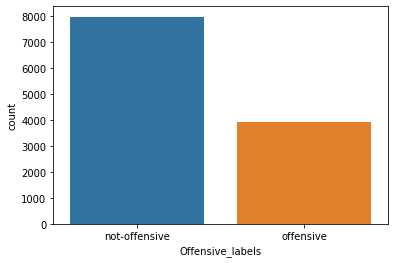

In [20]:
sns.countplot(x = 'Offensive_labels',data = df_offensive)

**Checking for missing values**

In [21]:
df_offensive.isna().sum() 

Offensive_Text      0
Offensive_labels    1
dtype: int64

**WORD CLOUD**

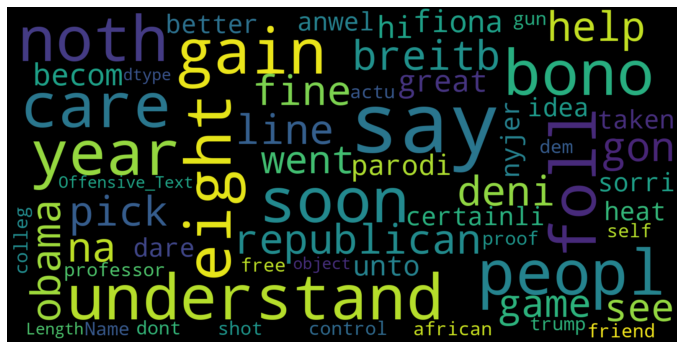

In [22]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(df_offensive['Offensive_Text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Using CountVectorizer and TF-IDF Vectorizer for translating text data into numeric form acceptable by the model**

In [23]:
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(df_offensive['Offensive_Text'])

In [24]:
cv_train_features

<11917x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 100051 stored elements in Compressed Sparse Row format>

In [25]:
tf = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tf_train_features = tf.fit_transform(df_offensive['Offensive_Text'])

In [26]:
tf_train_features

<11917x102328 sparse matrix of type '<class 'numpy.float64'>'
	with 223424 stored elements in Compressed Sparse Row format>

In [27]:
print('Bag of Words model: Train features shape:', cv_train_features.shape)
print('TFIDF model: Train features shape:', tf_train_features.shape)

Bag of Words model: Train features shape: (11917, 10000)
TFIDF model: Train features shape: (11917, 102328)
